In [27]:
# importing dependencies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn import metrics
import numpy as np
from scipy.stats import skew, kurtosis
from scipy import stats


In [4]:
#Data EDA and processing
df = pd.read_csv('Car details v3.csv')
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [ ]:
print("Shape:", df.shape)
print(f"Number of Rows: {df.shape[0]}")
print(f"Number of Columns: {df.shape[1]}")

Shape: (8128, 13)
Number of Rows: 8128
Number of Columns: 13


In [7]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


None

In [8]:
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print("Numerical Columns:", numerical_cols)

Numerical Columns: ['year', 'selling_price', 'km_driven', 'seats']


In [10]:
df[numerical_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
year,8128.0,2013.804011,4.044249,1983.0,2011.0,2015.0,2017.0,2020.0
selling_price,8128.0,638271.807702,806253.403508,29999.0,254999.0,450000.0,675000.0,10000000.0
km_driven,8128.0,69819.510827,56550.554958,1.0,35000.0,60000.0,98000.0,2360457.0
seats,7907.0,5.416719,0.959588,2.0,5.0,5.0,5.0,14.0


In [12]:
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print("Categorical Columns:", categorical_cols)

Categorical Columns: ['name', 'fuel', 'seller_type', 'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque']


In [14]:
for col in categorical_cols:
    print(f"\nColumn: {col}")
    print(f"Unique values in '{col}': {df[col].unique()}")
    print(df[col].describe())


Column: name
Unique values in 'name': ['Maruti Swift Dzire VDI' 'Skoda Rapid 1.5 TDI Ambition'
 'Honda City 2017-2020 EXi' ... 'Tata Nexon 1.5 Revotorq XT'
 'Ford Freestyle Titanium Plus Diesel BSIV'
 'Toyota Innova 2.5 GX (Diesel) 8 Seater BS IV']
count                       8128
unique                      2058
top       Maruti Swift Dzire VDI
freq                         129
Name: name, dtype: object

Column: fuel
Unique values in 'fuel': ['Diesel' 'Petrol' 'LPG' 'CNG']
count       8128
unique         4
top       Diesel
freq        4402
Name: fuel, dtype: object

Column: seller_type
Unique values in 'seller_type': ['Individual' 'Dealer' 'Trustmark Dealer']
count           8128
unique             3
top       Individual
freq            6766
Name: seller_type, dtype: object

Column: transmission
Unique values in 'transmission': ['Manual' 'Automatic']
count       8128
unique         2
top       Manual
freq        7078
Name: transmission, dtype: object

Column: owner
Unique values in 'o

In [ ]:
def missing_values_analysis(df):
    
    missing = pd.DataFrame({
        'Column': df.columns,
        'Missing_Count': df.isnull().sum(),
        'Missing_Percentage': (df.isnull().sum() / len(df)) * 100,
        'Data_Type': df.dtypes
    })
    missing = missing[missing['Missing_Count'] > 0].sort_values('Missing_Percentage', ascending=False)

    print("Missing Values Summary:")
    if len(missing) > 0:
        print(missing)
    else:
        print("No missing values found")
    
    print(f"\nTotal missing values: {df.isnull().sum().sum()}")
    print(f"Percentage of missing data: {(df.isnull().sum().sum() / (df.shape[0] * df.shape[1])) * 100:.2f}%")

In [20]:
missing_values_analysis(df)

Missing Values Summary:
              Column  Missing_Count  Missing_Percentage Data_Type
torque        torque            222            2.731299    object
mileage      mileage            221            2.718996    object
engine        engine            221            2.718996    object
seats          seats            221            2.718996   float64
max_power  max_power            215            2.645177    object

Total missing values: 1100
Percentage of missing data: 1.04%


In [ ]:
def duplicate_analysis(df):
    duplicates = df.duplicated().sum()
    print(f"\nNumber of duplicate rows: {duplicates}")
    print(f"Percentage of duplicates: {(duplicates / len(df)) * 100:.2f}%")
    
    if duplicates > 0:
        print("\nDuplicate Rows:")
        print(df[df.duplicated(keep=False)].sort_values(by=list(df.columns)))

In [22]:
duplicate_analysis(df)


DUPLICATE VALUES ANALYSIS

Number of duplicate rows: 1202
Percentage of duplicates: 14.79%

Duplicate Rows:
                                      name  year  ...               torque  seats
1977  Audi Q3 2.0 TDI Quattro Premium Plus  2017  ...  380Nm@ 1750-2500rpm    5.0
7324  Audi Q3 2.0 TDI Quattro Premium Plus  2017  ...  380Nm@ 1750-2500rpm    5.0
2129               Audi Q5 3.0 TDI Quattro  2014  ...  580Nm@ 1400-3250rpm    5.0
7775               Audi Q5 3.0 TDI Quattro  2014  ...  580Nm@ 1400-3250rpm    5.0
131             Audi Q5 35TDI Premium Plus  2018  ...  400nm@ 1750-3000rpm    5.0
...                                    ...   ...  ...                  ...    ...
6693        Volvo XC40 D4 Inscription BSIV  2019  ...                400Nm    5.0
6963        Volvo XC40 D4 Inscription BSIV  2019  ...                400Nm    5.0
7862        Volvo XC40 D4 Inscription BSIV  2019  ...                400Nm    5.0
145                 Volvo XC40 D4 R-Design  2018  ...                40

In [23]:
def unique_values_analysis(df):
    
    unique_info = pd.DataFrame({
        'Column': df.columns,
        'Unique_Count': [df[col].nunique() for col in df.columns],
        'Unique_Percentage': [(df[col].nunique() / len(df)) * 100 for col in df.columns],
        'Sample_Values': [df[col].unique()[:5].tolist() for col in df.columns]
    })
    
    print("\n", unique_info)
    
    # Detailed view for categorical columns
    categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
    
    print("\n" + "-"*80)
    print("Categorical Columns - Value Counts:")
    for col in categorical_cols:
        print(f"\n{col}:")
        print(df[col].value_counts())

In [24]:
unique_values_analysis(df)


            Column  ...                                      Sample_Values
0            name  ...  [Maruti Swift Dzire VDI, Skoda Rapid 1.5 TDI A...
1            year  ...                     [2014, 2006, 2010, 2007, 2017]
2   selling_price  ...           [450000, 370000, 158000, 225000, 130000]
3       km_driven  ...            [145500, 120000, 140000, 127000, 45000]
4            fuel  ...                         [Diesel, Petrol, LPG, CNG]
5     seller_type  ...             [Individual, Dealer, Trustmark Dealer]
6    transmission  ...                                [Manual, Automatic]
7           owner  ...  [First Owner, Second Owner, Third Owner, Fourt...
8         mileage  ...  [23.4 kmpl, 21.14 kmpl, 17.7 kmpl, 23.0 kmpl, ...
9          engine  ...      [1248 CC, 1498 CC, 1497 CC, 1396 CC, 1298 CC]
10      max_power  ...     [74 bhp, 103.52 bhp, 78 bhp, 90 bhp, 88.2 bhp]
11         torque  ...  [190Nm@ 2000rpm, 250Nm@ 1500-2500rpm, 12.7@ 2,...
12          seats  ...              


Distribution Metrics:

year:
  Skewness: -1.0721
  Kurtosis: 1.7052
  Shapiro-Wilk test p-value: 0.0000
  Normal distribution: No

selling_price:
  Skewness: 4.1928
  Kurtosis: 21.0676
  Shapiro-Wilk test p-value: 0.0000
  Normal distribution: No

km_driven:
  Skewness: 11.1688
  Kurtosis: 383.8604
  Shapiro-Wilk test p-value: 0.0000
  Normal distribution: No

seats:
  Skewness: 1.9695
  Kurtosis: 3.7963
  Shapiro-Wilk test p-value: 0.0000
  Normal distribution: No


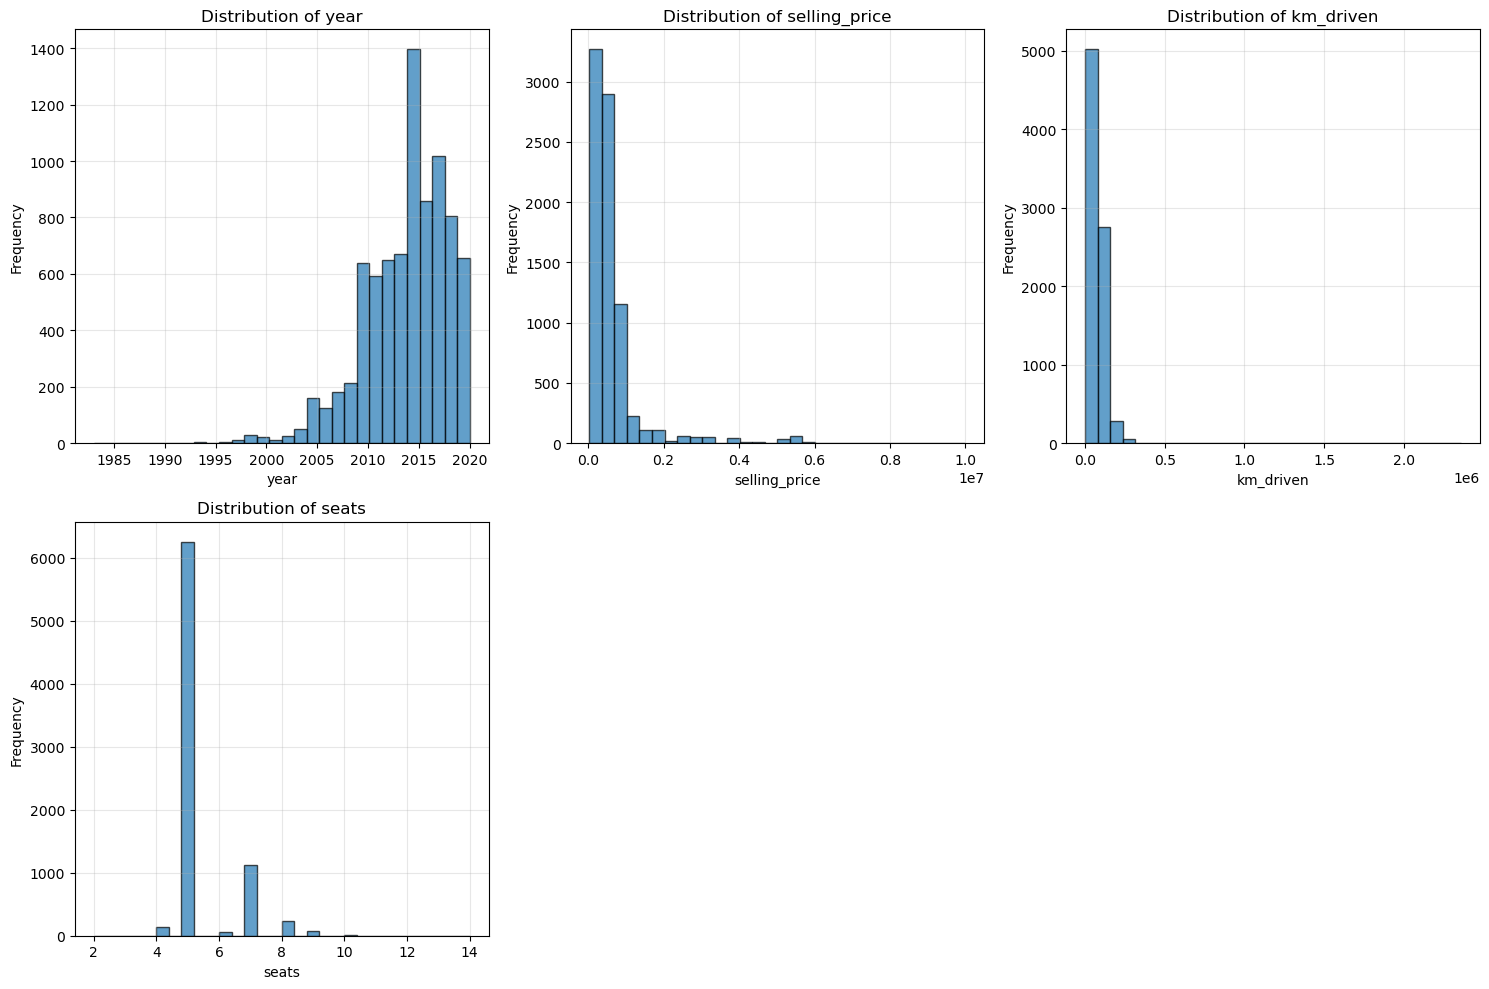

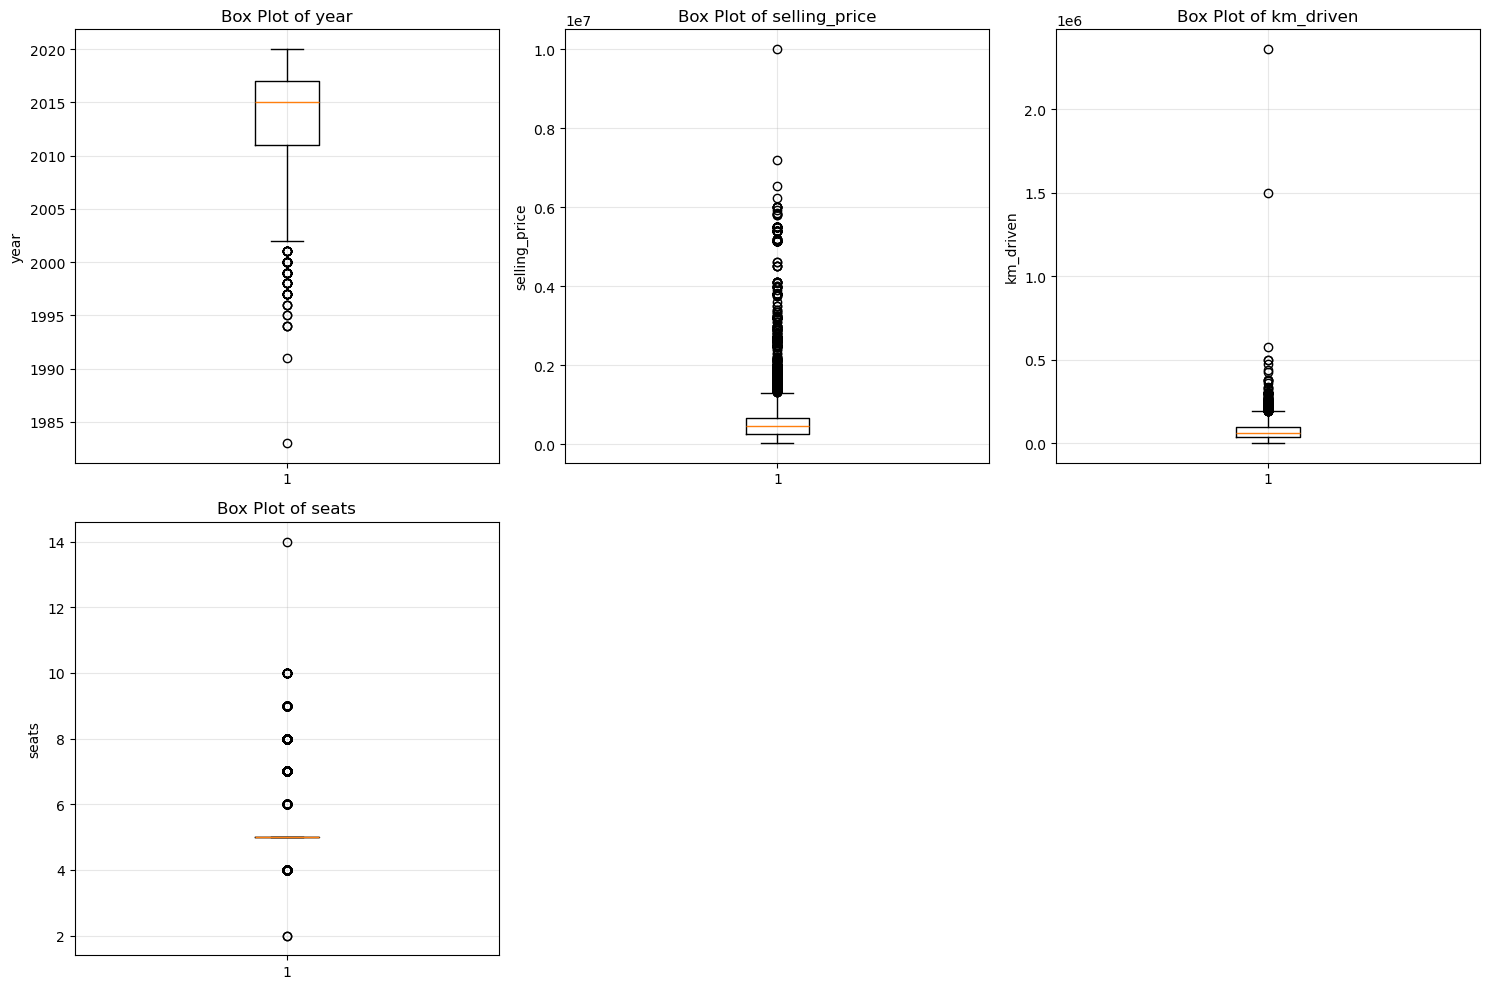

In [29]:
def distribution_analysis(df):
    numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    
    # Distribution metrics
    print("\nDistribution Metrics:")
    for col in numerical_cols:
        print(f"\n{col}:")
        print(f"  Skewness: {skew(df[col].dropna()):.4f}")
        print(f"  Kurtosis: {kurtosis(df[col].dropna()):.4f}")
        
        # Normality test
        if len(df[col].dropna()) >= 3:
            stat, p_value = stats.shapiro(df[col].dropna().sample(min(5000, len(df[col].dropna()))))
            print(f"  Shapiro-Wilk test p-value: {p_value:.4f}")
            print(f"  Normal distribution: {'Yes' if p_value > 0.05 else 'No'}")
    
    # Histograms
    n_cols = len(numerical_cols)
    n_rows = (n_cols + 2) // 3
    
    fig, axes = plt.subplots(n_rows, 3, figsize=(15, 5*n_rows))
    axes = axes.flatten() if n_cols > 1 else [axes]
    
    for idx, col in enumerate(numerical_cols):
        axes[idx].hist(df[col].dropna(), bins=30, edgecolor='black', alpha=0.7)
        axes[idx].set_title(f'Distribution of {col}')
        axes[idx].set_xlabel(col)
        axes[idx].set_ylabel('Frequency')
        axes[idx].grid(True, alpha=0.3)
    
    # Hide empty subplots
    for idx in range(len(numerical_cols), len(axes)):
        axes[idx].axis('off')
    
    plt.tight_layout()
    plt.show()
    
    # Box plots
    fig, axes = plt.subplots(n_rows, 3, figsize=(15, 5*n_rows))
    axes = axes.flatten() if n_cols > 1 else [axes]
    
    for idx, col in enumerate(numerical_cols):
        axes[idx].boxplot(df[col].dropna())
        axes[idx].set_title(f'Box Plot of {col}')
        axes[idx].set_ylabel(col)
        axes[idx].grid(True, alpha=0.3)
    
    for idx in range(len(numerical_cols), len(axes)):
        axes[idx].axis('off')
    
    plt.tight_layout()
    plt.show()

distribution_analysis(df)

In [34]:
def outlier_detection(df):

    numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    
    print("\nIQR Method (Outliers beyond 1.5 * IQR):")
    for col in numerical_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outlier_count = len(outliers)
        outlier_percentage = (outlier_count / len(df)) * 100
        
        print(f"\n{col}:")
        print(f"  Lower bound: {lower_bound:.2f}")
        print(f"  Upper bound: {upper_bound:.2f}")
        print(f"  Outliers count: {outlier_count}")
        print(f"  Outliers percentage: {outlier_percentage:.2f}%")
    
    print("Z-Score Method (|Z-score| > 3):")
    for col in numerical_cols:
        z_scores = np.abs(stats.zscore(df[col].dropna()))
        outliers = np.sum(z_scores > 3)
        outlier_percentage = (outliers / len(df[col].dropna())) * 100
        
        print(f"\n{col}:")
        print(f"  Outliers count: {outliers}")
        print(f"  Outliers percentage: {outlier_percentage:.2f}%")


In [35]:
outlier_detection(df)


IQR Method (Outliers beyond 1.5 * IQR):

year:
  Lower bound: 2002.00
  Upper bound: 2026.00
  Outliers count: 81
  Outliers percentage: 1.00%

selling_price:
  Lower bound: -375002.50
  Upper bound: 1305001.50
  Outliers count: 600
  Outliers percentage: 7.38%

km_driven:
  Lower bound: -59500.00
  Upper bound: 192500.00
  Outliers count: 170
  Outliers percentage: 2.09%

seats:
  Lower bound: 5.00
  Upper bound: 5.00
  Outliers count: 1653
  Outliers percentage: 20.34%
Z-Score Method (|Z-score| > 3):

year:
  Outliers count: 81
  Outliers percentage: 1.00%

selling_price:
  Outliers count: 229
  Outliers percentage: 2.82%

km_driven:
  Outliers count: 72
  Outliers percentage: 0.89%

seats:
  Outliers count: 102
  Outliers percentage: 1.29%


In [36]:
def correlation_analysis(df):
    
    numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    
    # Pearson correlation
    print("\nPearson Correlation Matrix:")
    corr_matrix = df[numerical_cols].corr()
    print(corr_matrix)
    
    # Heatmap
    plt.figure(figsize=(12, 10))
    sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
                center=0, square=True, linewidths=1)
    plt.title('Correlation Heatmap (Pearson)')
    plt.tight_layout()
    plt.show()
    
    # High correlations
    print("High Correlations (|r| > 0.7):")
    high_corr = []
    for i in range(len(corr_matrix.columns)):
        for j in range(i+1, len(corr_matrix.columns)):
            if abs(corr_matrix.iloc[i, j]) > 0.7:
                high_corr.append({
                    'Feature 1': corr_matrix.columns[i],
                    'Feature 2': corr_matrix.columns[j],
                    'Correlation': corr_matrix.iloc[i, j]
                })
    
    if high_corr:
        print(pd.DataFrame(high_corr))
    else:
        print("No high correlations found.")
    
    # Spearman correlation
    print("Spearman Correlation Matrix:")
    spearman_corr = df[numerical_cols].corr(method='spearman')
    print(spearman_corr)



Pearson Correlation Matrix:
                   year  selling_price  km_driven     seats
year           1.000000       0.414092  -0.418006 -0.009144
selling_price  0.414092       1.000000  -0.225534  0.041358
km_driven     -0.418006      -0.225534   1.000000  0.227336
seats         -0.009144       0.041358   0.227336  1.000000


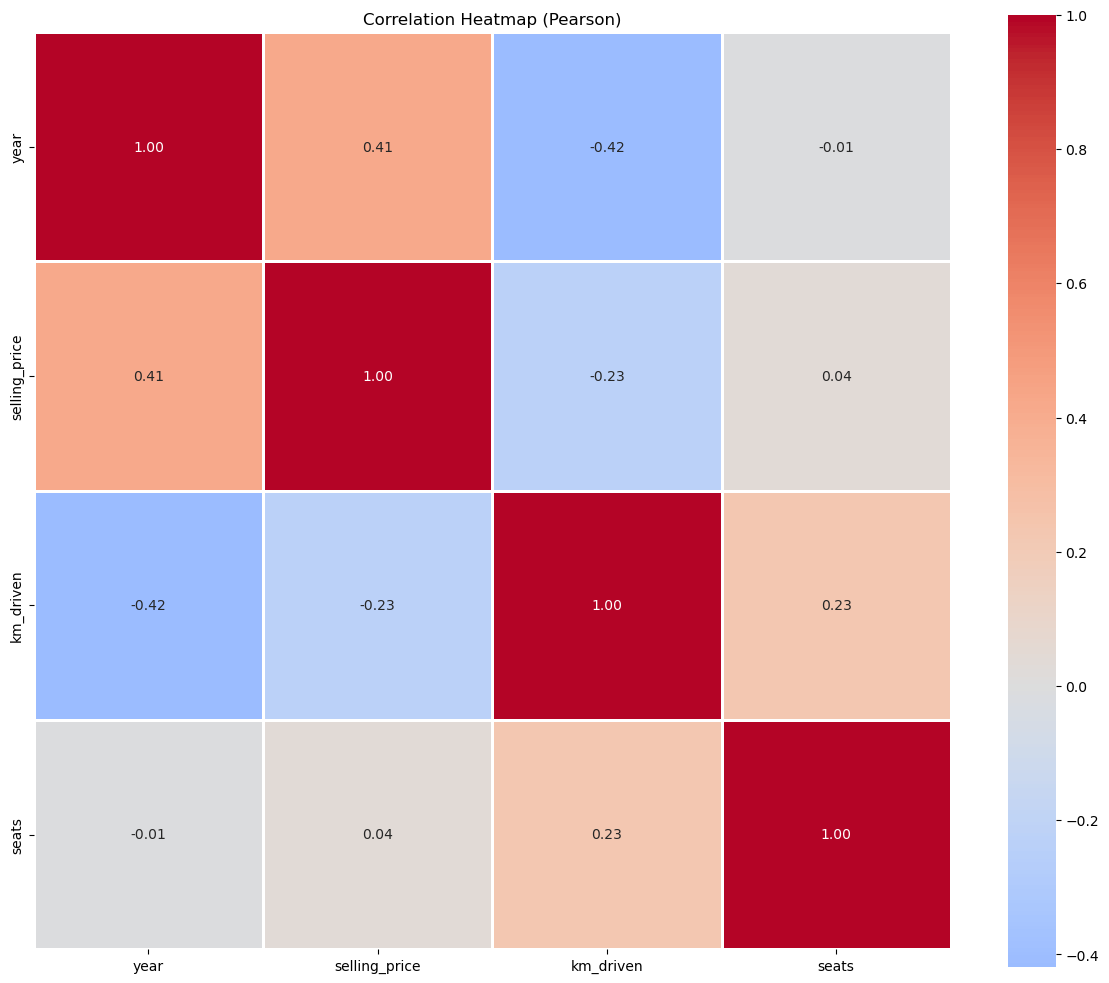

High Correlations (|r| > 0.7):
No high correlations found.
Spearman Correlation Matrix:
                   year  selling_price  km_driven     seats
year           1.000000       0.713523  -0.617792 -0.010459
selling_price  0.713523       1.000000  -0.355087  0.263143
km_driven     -0.617792      -0.355087   1.000000  0.228042
seats         -0.010459       0.263143   0.228042  1.000000


In [37]:
correlation_analysis(df)

In [44]:
def categorical_analysis(df):

    new_category_cols = ['owner', 'fuel', 'seller_type', 'transmission']
    
    # keep only columns that exist in df
    categorical_cols = [c for c in new_category_cols if c in df.columns]

    for col in categorical_cols:
        plt.figure(figsize=(10, 6))
        df[col].value_counts().plot(kind='bar', edgecolor='black', alpha=0.7)

        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.xticks(rotation=45, ha='right')
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()

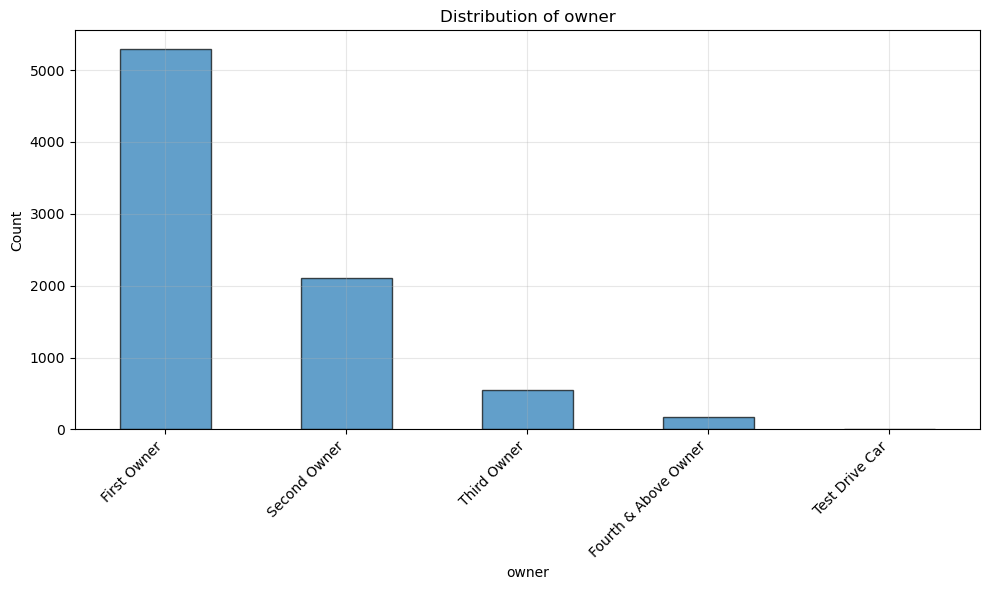

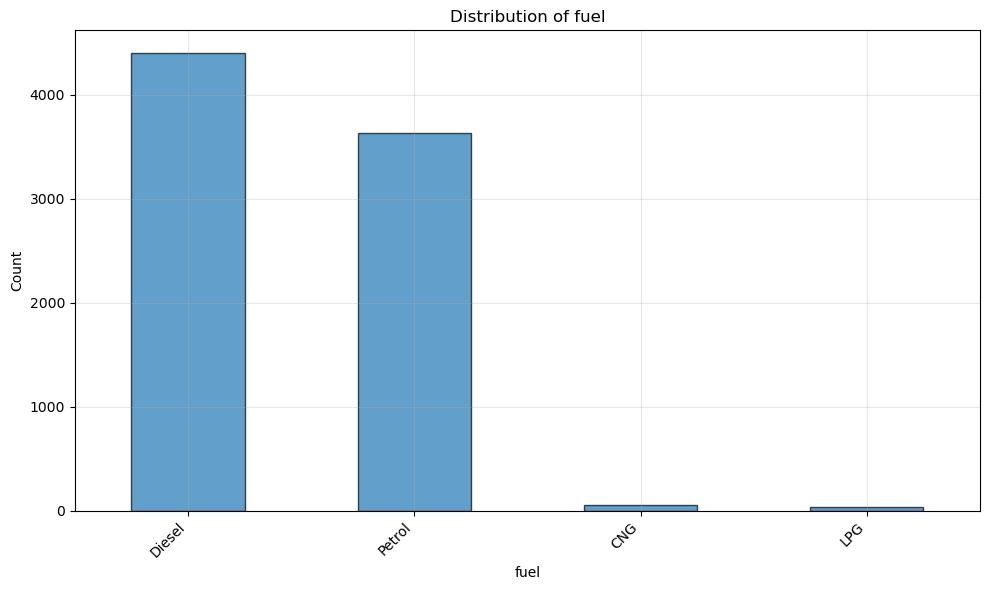

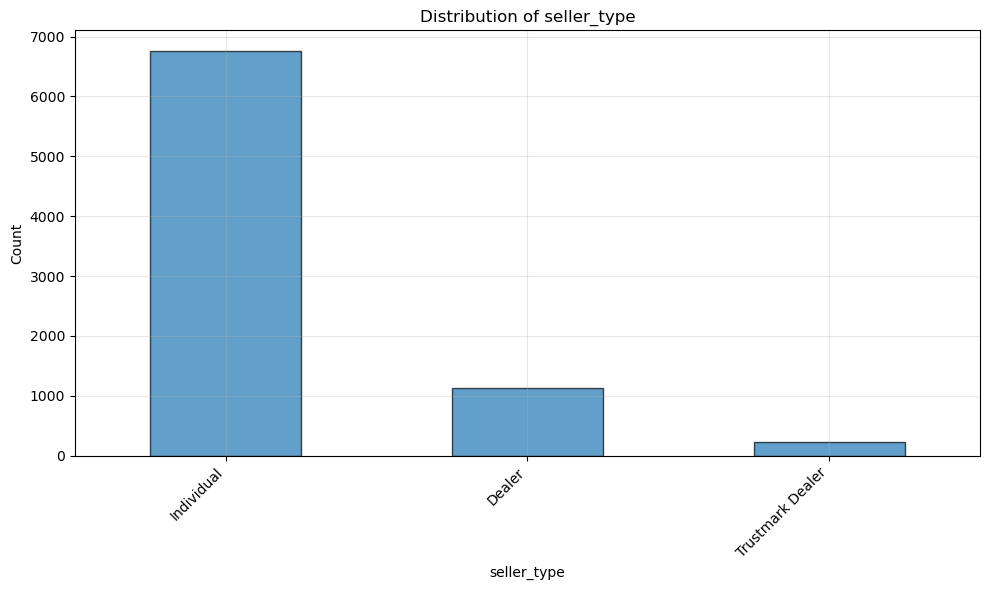

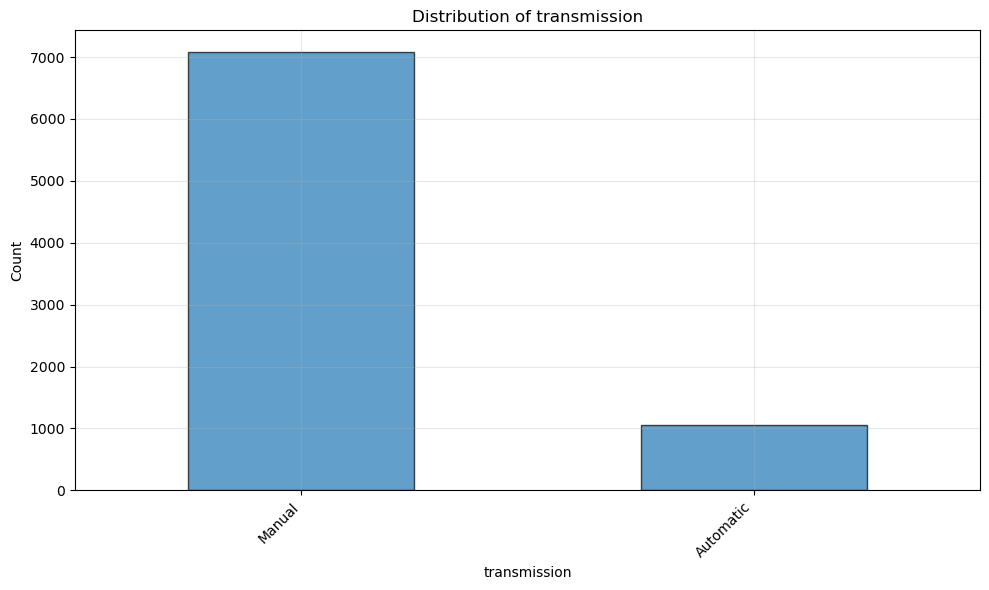

In [45]:
categorical_analysis(df)